## Interpolating the data from adcps from one mooring one regular 2D time-depth grid

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import os
import glob
import pandas as pd
import mplniw.utils as ut
import mplniw.sigp as sp
from datetime import timedelta, datetime
import mplniw.plot as pl

In [14]:
root_dir = '/Users/zcasparcohen/Documents/NISKINE/data/v1/'
data_dir = '/Users/zcasparcohen/codes/NIW/data/'
mooring = 3

In [15]:
listfile = sorted(filter(os.path.isfile,glob.glob(root_dir+'M%s_*'%mooring)))
arraylist = {'%s'%file.split('_')[1][:-3]:xr.open_dataset(file) for file in listfile}
dt = 10 # time step in minutes
t_new = pd.date_range(start='2019-05-17T16', end='2020-10-06T00', freq=timedelta(minutes=dt))  # new time grid
z_new = np.arange(0,2000,16) # new depth grid
minDT = 60  # minimal time length for adcp

In [16]:
ds,ds_fill = sp.interpolation(arraylist,z_new,t_new,dt=dt,minDT=minDT,**{'method':'slinear','max_gap':150})
#ds_lin,ds_fill_lin = sp.interpolation(arraylist,z_new,t_new,dt=dt,minDT=minDT,**{'method':'linear','max_gap':150})
#ds_quad,ds_fill_quad = sp.interpolation(arraylist,z_new,t_new,dt=dt,minDT=minDT,**{'method':'quadratic','max_gap':150,'bound_error':False,'fill_value':'extrapolate'})
ds_cubic,ds_fill_cubic = sp.interpolation(arraylist,z_new,t_new,dt=dt,minDT=minDT,**{'method':'cubic','max_gap':150})

### Comparing with other interpolation method (Gunnar)

In [5]:
ds_gridded = xr.open_dataset(root_dir+'../gridded/'+'M%s_gridded_simple_merge_gaps_filled.nc'%mooring)
ds_gaps = xr.open_dataset(root_dir+'../gridded/'+'M%s_gridded_simple_merge.nc'%mooring)

(<Figure size 1200x500 with 4 Axes>, <Axes: xlabel='time', ylabel='depth [m]'>)

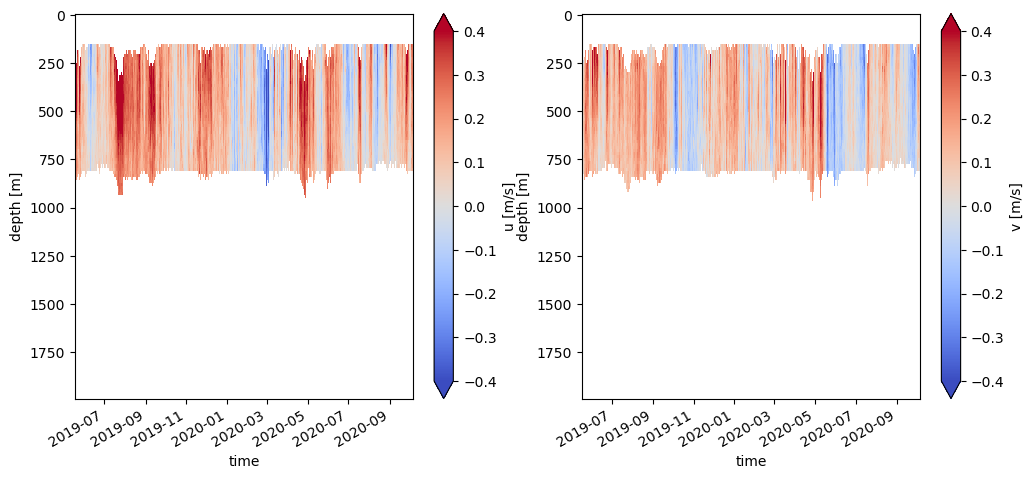

In [18]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121)
pl.plot_uv(ds_fill,'u',fig,ax)
ax = fig.add_subplot(122)
pl.plot_uv(ds_fill,'v',fig,ax)

#fig = plt.figure(figsize=(12,5))
#ax = fig.add_subplot(121)
#pl.plot_uv(ds_gridded,'u',fig,ax)
#ax = fig.add_subplot(122)
#pl.plot_uv(ds_gridded,'v',fig,ax)

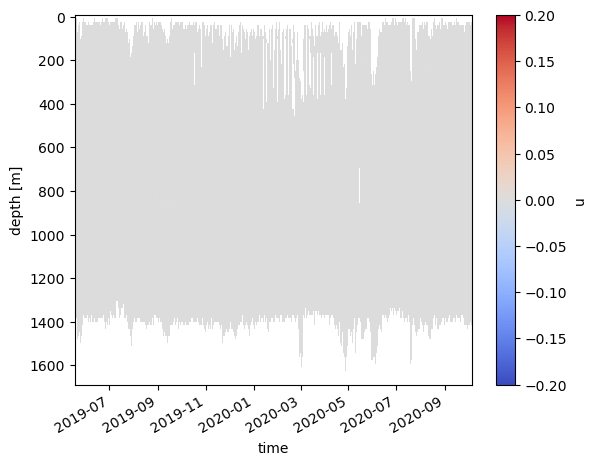

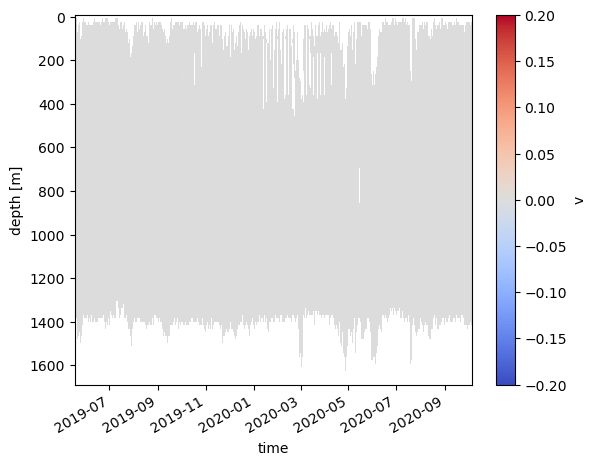

In [7]:
(ds_fill.u-ds_gridded.u).plot(yincrease=False,cmap='coolwarm',vmin=-0.2,vmax=0.2)
plt.figure()
(ds_fill.v-ds_gridded.v).plot(yincrease=False,cmap='coolwarm',vmin=-0.2,vmax=0.2)

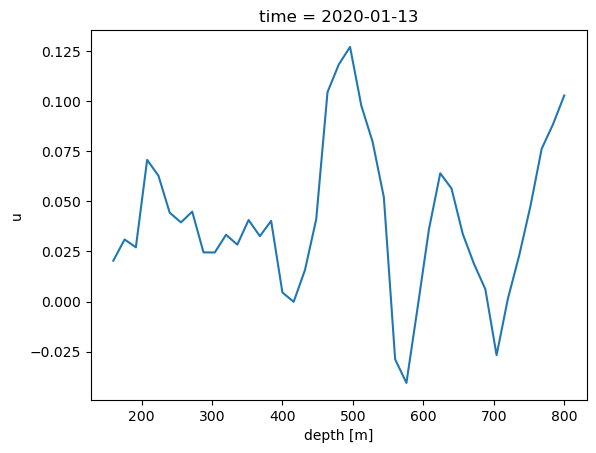

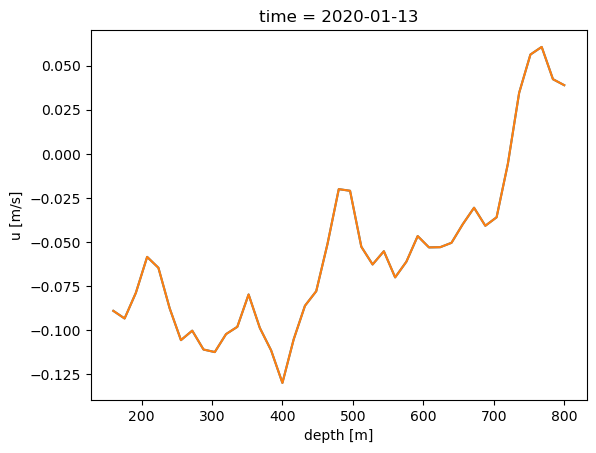

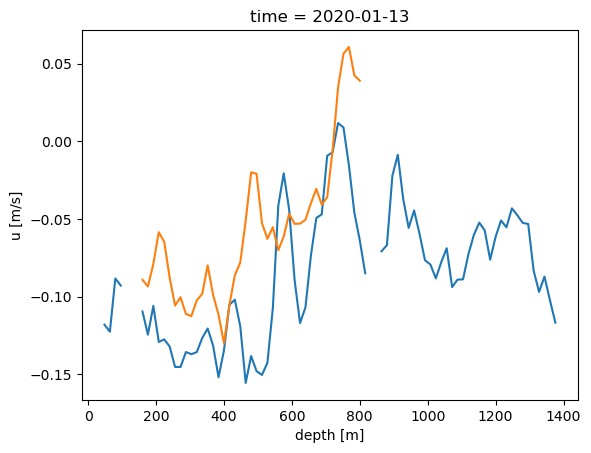

In [19]:
t = '2020-01-13T00:00'
(ds_fill.u-ds_gridded.u).sel(time=t,method='nearest').plot()
plt.figure()
#ds_gridded.u.sel(time=t,method='nearest').plot()
ds_fill.u.sel(time=t,method='nearest').plot()
ds_fill_cubic.u.sel(time=t,method='nearest').plot()

plt.figure()
ds_gaps.u.sel(time=t,method='nearest').plot()
ds.u.sel(time=t,method='nearest').plot()
#ds_quad.u.sel(time=t,method='nearest').plot()

In [20]:
# Save files
ds_fill.to_netcdf(data_dir+'M%s_linear_merge_slinearfill.nc'%mooring,'w')
#ds_fill_quad.to_netcdf(data_dir+'M%s_linear_merge_quadracticfill.nc'%mooring,'w')
ds_fill_cubic.to_netcdf(data_dir+'M%s_linear_merge_cubicfill.nc'%mooring,'w')

### Notes
